<h2><font color="#004D7F" size=5>Módulo 2: Bootstrap Aggregation</font></h2>


<h1><font color="#004D7F" size=6> 6. Random Forest</font></h1>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo de conjunto Random Forest](#section1)
    * [1.1. Bagging Vs. Random Forest](#section11)
    * [1.2. Hiperparámetros de Random Forest](#section12)
* [2. Random Forest según el tipo de problema](#section2)
    * [2.1. Random Forest para Clasificación](#section21)
    * [2.2. Random Forest para Regresión](#section22)
* [3. Hiperparámetros de Random Forest](#section3)
   * [3.1. Número de muestras](#section31)
   * [3.2. Número de características](#section32)
   * [3.3. Número de árboles](#section33)
   * [3.4. Profundidad del árbol](#section34)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Es de los más conocidos y es fácil de usar dado que tiene pocos hiperparámetros y heurísticas para configurar estos hiperparámetros. Después de completar este tutorial, sabrá:
- Random Forest es un conjunto de árboles de decisión y una extensión natural del Bagging.
- Cómo utilizar Random Forest para clasificación y regresión con Scikit-learn.
- Cómo explorar el efecto de los hiperparámetros en el rendimiento del modelo.

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo de conjunto Random Forest</font>

Random Forest es un conjunto de algoritmos de árboles de decisión. Es una extensión de la agregación bootstrap (Bagging) y puede usarse para problemas de clasificación y regresión. 

<figure><center>
  <img src="data/random-forest.jpg" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>Random Forest. Extraída de <a href="https://anasbrital98.github.io/blog/2021/Random-Forest/">GitHub</a></blockquote></figcaption>
</center></figure>

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Bagging Vs. Random Forest</font>

<a id="section111"></a>
### <font color="#004D7F"> 1.1.1. Bagging</font>

- Se crean varios árboles de decisión donde cada árbol se crea a partir de una muestra de arranque diferente del conjunto de datos de entrenamiento. 
- Una muestra de arranque es una muestra del conjunto de datos de entrenamiento donde se puede seleccionar una instancia (fila) más de una vez. 
- Esto se conoce como muestreo con reemplazo (de instancias).
- Por tanto, cada árbol se ajusta a un dataset diferente
- Los árboles no se podan, lo que los hace ligeramente sobreajustados al conjunto de datos de entrenamiento. Esto es deseable ya que ayuda a que cada árbol sea más diferente y tenga menos predicciones correlacionadas o errores de predicción.

<a id="section112"></a>
### <font color="#004D7F"> 1.1.2. Random Forest</font>

- Como Bagging, Random Forest implica la construcción de una gran cantidad de árboles de decisión a partir de muestras de arranque.
- La diferencia es que Random Forest implica seleccionar un subconjunto de características de entrada (columnas o variables) en la construcción de los árboles.
- Al reducir las características que puede considerarse en cada punto de división, se obliga a que cada árbol de decisión construido sea más diferente.
- El hiperparámetro más importante es la cantidad de características aleatorias a considerar en cada punto de división. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Importante__: El efecto es que las predicciones y, a su vez, los errores de predicción realizados por cada árbol del conjunto son más diferentes o menos correlacionados. 
</div>

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Hiperparámetros de Random Forest</font>

<a id="section121"></a>
### <font color="#004D7F"> 1.2.1. División para problema de regresión</font>

Breiman recomienda: Una buena heurística para la regresión es establecer este hiperparámetro en $\frac{1}{3}$ del número de características de entrada.

$$
num\_features\_for\_split = \frac{total\_input\_features}{3}    
$$

<a id="section122"></a>
### <font color="#004D7F"> 1.2.2. División para problema de clasificación</font>

Breiman recomienda: Una buena heurística para la clasificación es establecer este hiperparámetro en la raíz cuadrada del número de características de entrada.

$$
num\_features\_for\_split = \sqrt{total\_input\_features}
$$

<a id="section123"></a>
### <font color="#004D7F"> 1.2.3. Profundidad y número de árboles</font>

- Los árboles más profundos suelen estar más ajustados a los datos de entrenamiento, pero también menos correlacionados, lo que a su vez puede mejorar el rendimiento del conjunto. Las profundidades de 1 a 10 niveles pueden ser efectivas. 
- En cuanto al número de árboles, esto se aumenta hasta que no se observa ninguna mejora adicional.

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. Random Forest según el tipo de problema</font>

- Usaremos Scikit-learn con las clases `RandomForestRegressor` y `RandomForestClassifier`. Ambos modelos operan de la misma manera y toman los mismos argumentos que influyen en cómo se crean los árboles de decisión. 
- La aleatoriedad se utiliza en la construcción del modelo. 
    - Esto significa que cada vez que el algoritmo se ejecuta con los mismos datos, producirá un modelo ligeramente diferente.
    - Cuando se utilizan algoritmos de aprendizaje automático que tienen un algoritmo de aprendizaje estocástico, es una buena práctica evaluarlo promediando su rendimiento en múltiples ejecuciones o repeticiones de validación cruzada.
- Al ajustar un modelo final, puede ser deseable aumentar el número de árboles hasta que la varianza del modelo se reduzca en evaluaciones repetidas, o ajustar múltiples modelos finales y promediar sus predicciones. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. Random Forest para Clasificación</font>

En esta sección, veremos el uso de Random Forest para un problema de clasificación.

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada.

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
</div>

In [3]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# definir el modelo
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy medio: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy medio: 0.904 (0.028)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. Random Forest para Regresión</font>

En esta sección, veremos el uso de Random Forest para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_regression()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

In [4]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
</div>

In [6]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.614 (8.184)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de Random Forest</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto Random Forest y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de muestras</font>

- Cada árbol de decisión del conjunto se ajusta a una muestra de arranque extraída del conjunto de datos de entrenamiento. 
    - Se puede desactivar estableciendo el argumento `bootstrap = False` que utilizará todo train para entrenar cada árbol de decisión. 
- El argumento `max_samples` establece un porcentaje del tamaño de muestras de train para cada árbol de decisión.
    - Por ejemplo, si tiene 100 filas, el argumento `max_samples` podría establecerse en 0,5 y cada árbol de decisión se ajustará a una muestra de arranque con (100 × 0,5) o 50 filas de datos. 
- Un tamaño de muestra más pequeño hará que los árboles sean más diferentes, y un tamaño de muestra más grande hará que los árboles sean más similares.
- Establecer `max_samples = None` hará que el tamaño de la muestra sea del mismo tamaño que el conjunto de datos de entrenamiento y este es el valor predeterminado.

Veamos un ejemplo evaluando de 10% al 100% de muestras.

In [7]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

In [15]:
# obtener la lsita de modelos del 10% al 100% en incrementos de 10%
def get_models():
    models = dict()
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

In [16]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [17]:
X, y = get_dataset()
# obtenemos los modelos
models = get_models()
# evaluación y resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    # almacenamiento de modelos
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.851 (0.029)
>0.2 0.877 (0.028)
>0.3 0.886 (0.024)
>0.4 0.887 (0.028)
>0.5 0.892 (0.025)
>0.6 0.897 (0.026)
>0.7 0.896 (0.024)
>0.8 0.898 (0.026)
>0.9 0.902 (0.029)
>1.0 0.907 (0.028)


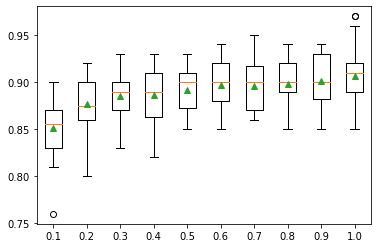

In [18]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Número de características</font>

- Se establece mediante el argumento `max_features` y por defecto es la raíz cuadrada del número de características de entrada. 
    - En este caso, sería $\sqrt{20}$, 4 características aprox. 
- Probaremos con valores del 1 al 7.

In [19]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# obtenemos la lista de modelos
def get_models():
    models = dict()
    # exploramos el número de característica desde 1 a 7
    for i in range(1,8):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models

In [20]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.887 (0.026)
>2 0.902 (0.024)
>3 0.905 (0.028)
>4 0.900 (0.025)
>5 0.901 (0.023)
>6 0.904 (0.023)
>7 0.897 (0.025)


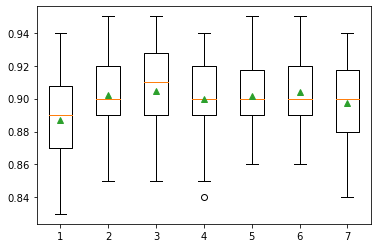

In [21]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Número de árboles</font>

- Normalmente, la cantidad de árboles aumenta hasta que se estabiliza el rendimiento del modelo. 
- La intuición podría sugerir que más árboles conducirán a un sobreajuste, aunque este no es el caso. 
    - Tanto los algoritmos Bagging como los de bosque aleatorio parecen ser algo inmunes al sobreajuste. 
- La cantidad de árboles se establece mediante el argumento `n_estimadores` y el valor predeterminado es 100. 
- El siguiente ejemplo explora el efecto de la cantidad de árboles con valores entre 10 y 1000.

In [22]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def get_models():
    models = dict()
    # definir el número de árboles
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    return models

In [23]:
X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.870 (0.033)
>50 0.901 (0.027)
>100 0.902 (0.026)
>500 0.908 (0.026)
>1000 0.904 (0.024)


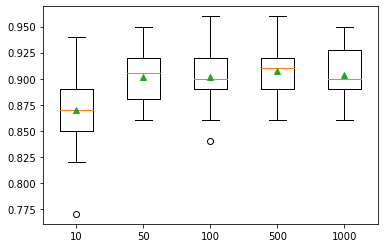

In [24]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section34"></a> 
## <font color="#004D7F"> 3.4. Profundidad del árbol</font>

- De forma predeterminada, los árboles se construyen a una profundidad arbitraria y no se podan. 
- La profundidad máxima del árbol se puede especificar mediante el argumento `max_depth` y está establecida en `None` (sin profundidad máxima) de forma predeterminada. 

In [25]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def get_models():
    # considerar la profundida del árbol de 1 a 7 y None=completo
    models = dict()
    depths = [i for i in range(1, 8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

In [26]:
X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.774 (0.041)
>2 0.811 (0.036)
>3 0.832 (0.033)
>4 0.858 (0.025)
>5 0.871 (0.024)
>6 0.883 (0.023)
>7 0.889 (0.024)
>None 0.905 (0.024)


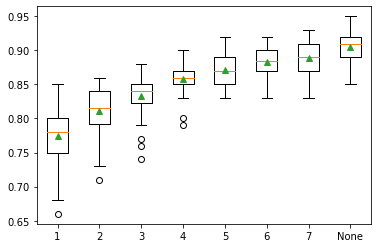

In [27]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---


<a id="sectionEj"></a>
<h3><font color="#004D7F" size=6> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicios</font></h3>

Se proponen las siguientes actividades para consolidar el aprendizaje.

# <font color="#004D7F" size=5>Ejercicio 1</font>
__Hiperparámetros__. Explore diferentes configuraciones que veas en la librería sobre Random forest y comente los resultados. 

# <font color="#004D7F" size=5>Ejercicio 2</font>
__Problema de Regresión__. Random Forest se puede utilizar con árboles de regresión. En lugar de predecir el valor de clase más común del conjunto de predicciones. Experimente con problemas de regresión.

# <font color="#004D7F" size=5>Ejercicio 3</font>
__Datasets reales__. Busque un dataset original y verdadero (que no sea sintético) y evalúe el uso de los conceptos vistos en esta unidad. Los conjuntos de datos en pueden ser obtenidos del [repositorio de aprendizaje automático de UCI](https://archive.ics.uci.edu/).

# <font color="#004D7F" size=5>Ejercicio 4</font>
__Búsqueda de la mejor configuración__. Como se ha visto existen diferentes hiperparámetros que pueden ajustar nuestro modelo. Haga una búsqueda para un dataset real de cuales, entre un rango amplio de hiperparétros, maximizan la métrica. Puede utilizar una búsqueda aleatoria.

---

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>